# 画图

In [60]:
%matplotlib notebook
import imp, time
from collections import Counter, OrderedDict, defaultdict, deque, namedtuple

import matplotlib.pyplot as plt
import numpy as np, sympy as sy
from sklearn.cluster import KMeans
from scipy import constants as const
from scipy.fftpack import fft, hilbert, ifft
from scipy.optimize import curve_fit
from scipy.optimize import least_squares as ls
from sympy import diff, symbols
import pandas as pd
import qulab.optimize
from qulab.storage import connect
from qulab.storage.schema import Record, base
from qulab.storage.utils import save

op = imp.reload(qulab.optimize)
connect.connect()

In [2]:
def read(title=None,which=0):
    
    if title is None:
        x = Record.objects.order_by('-finished_time')[which]
    else:
        x = Record.objects(title=title).order_by('-finished_time')[which]
    tags, comment, name = x['tags'], x['comment'], x['title']
    data, ID = base.from_pickle(x.datafield), x.id
    return data, ID, comment, tags, name

In [3]:
def write(phase=None,addr='mongodb',height=2,title=None,which=0,peak=110):
    if addr == 'mongodb':
        data, ID, comment, tags, name = read(title=title,which=which)
    else:
        d = np.load(addr)
        data, tags = (d['row'],d['col'],d['s']), d['tags']

    if len(data) == 2:
        num = len(data[0].T)
        if phase == 'phase': 
            fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,height*num))
            fig.subplots_adjust(top=0.98,bottom=0.02,hspace=0.2)
            v = []
            for i in range(num): 
                f, s = data[0][:,i],data[1][:,i]
                f = f / 1e9 if f[0] / 1e9 > 1 else f
                v.append((f,s))
                if num != 1:
                    
                    axes[i][0].plot(f,abs(s))
                    axes[i][1].plot(f,np.angle(s))
                else:
                    axes[0].plot(f,abs(s))
                    axes[1].plot(f,np.angle(s))
        else:
            n = num // 2 + num % 2
            fig, axes = plt.subplots(ncols=2,nrows=n,figsize=(9,height*n))
            fig.subplots_adjust(top=0.9,bottom=0.1,hspace=0.5)
            v = []
            for i in range(num): 
                f, s = data[0][:,i],data[1][:,i]
                f = f / 1e9 if f[0] / 1e9 > 1 else f
                v.append((f,s))
                if n != 1:
                    axes[i//2][i%2].plot(f,abs(s))
                    #axes[i//2][i%2].set_title(name)
                else:
                    axes[i].plot(f,abs(s))
                    if addr == 'mongodb':
                        axes[i].set_title(name)
        return v,num,tags
    if len(data) == 3 :
        
        num = len(data[0].T)
        if phase == 'phase': 
            n = num // 2 + num % 2
            fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,height*num))
            fig.subplots_adjust(top=0.9,bottom=0.1,hspace=0.5)
            v = []
            for i in range(num): 
                cols, rows, s= data[0][:,i], data[1][0,:], data[2][:,:,i]
                rows = rows / 1e9 if rows[0] / 1e9 > 1 else rows 
                cols = cols / 1e9 if cols[0] / 1e9 > 1 else cols 
                v.append((cols,rows,s))
                extent = [min(rows),max(rows),min(cols),max(cols)]
                if n != 1:
                    axes[i//2][i%2].imshow(abs(s),extent=extent,aspect='auto',origin='lower',interpolation='nearest')
                    #axes[i][1].imshow(np.angle(s),extent=extent,aspect='auto',origin='lower',interpolation='nearest')
                else:
                    #axes[0].imshow(abs(s),extent=extent,aspect='auto',origin='lower',interpolation='nearest')
                    axes[i].imshow(np.angle(s),extent=extent,aspect='auto',origin='lower',interpolation='nearest')
        else:
            n = num // 2 + num % 2
            fig, axes = plt.subplots(ncols=2,nrows=n,figsize=(9,height*n))
            fig.subplots_adjust(top=0.9,bottom=0.1,hspace=0.5)
            v = []
            for i in range(num): 
                cols, rows, s= data[0][:,i], data[1][0][:,i], data[2][:,:,i]
                rows = rows / 1e9 if rows[0] / 1e9 > 1 else rows 
                cols = cols / 1e9 if cols[0] / 1e9 > 1 else cols 
                s[np.abs(s) > peak] = s[np.abs(s)==np.min(np.abs(s))]
                v.append((cols,rows,s))
                extent = [min(rows),max(rows),min(cols),max(cols)]
                if n != 1:
                    axes[i//2][i%2].imshow(abs(s),extent=extent,aspect='auto',origin='lower',interpolation='nearest')
                    axes[i//2][i%2].set_title(tags[0])
                else:
                    axes[i].imshow(np.abs(s),extent=extent,aspect='auto',origin='lower',interpolation='nearest',animated=True)
                    axes[i].set_title(tags[0])
        return v,num,tags

In [63]:
x = np.array([0,1,2])
x[:] = 1

In [73]:
np.array([2,4])/np.array([2,2])

array([1., 2.])

# qubit工作点

In [32]:

atributte = ['q_name','inst','T_bias','specfunc','bias','zpulse','f_lo','delta','f_ex','delta_ex',\
             'power_ex','power_rabi','pi_len','T1','state']
qubit = namedtuple('qubit',atributte,defaults=[None]*len(atributte))


## 保存qubit工作点

In [221]:
qstate = []
def tuple2dict(q):
    for i in q:
        qstate.append(i._asdict())
    return qstate

bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
filepath = save('QubitState','qubitstate',state = tuple2dict(bit),base_path=r'D:\skzhao\file_name')
with open(r'D:\skzhao\file_name\file_name.txt', mode='a') as filename:
    filename.write(str(filepath))
    filename.write('\n')
print(filepath)

D:\skzhao\file_name\2020\0327\QubitState\qubitstate_20200327084652.npz


In [220]:
q10 = q10._replace(inst={'dc': 'dc10', 'z_awg': 'awg131', 'z_ch': 8, 'ex_awg': 'awg132', 'ex_ch': [5, 6], 'ex_lo': 'psg_ex3', 'com': 'com6'})

## 提取qubit工作点

In [33]:
fl = np.loadtxt(r'D:\skzhao\file_name\file_name.txt',dtype='str')
f = str(fl[-1])
data = np.load(f,allow_pickle=True)
def dict2tuple(q):
    bit = []
    for i,k in enumerate(q):
        attr = []
        for j in atributte:
            if j in k:
                attr.append(k[j])
            else:
                attr.append(None)
        globals()['q%d'%(i+1)] = qubit(*attr)

dict2tuple(data['state'])
print(f)

D:\skzhao\file_name\2020\0331\QubitState\qubitstate_20200331220551.npz


# 查看图形

<IPython.core.display.Javascript object>


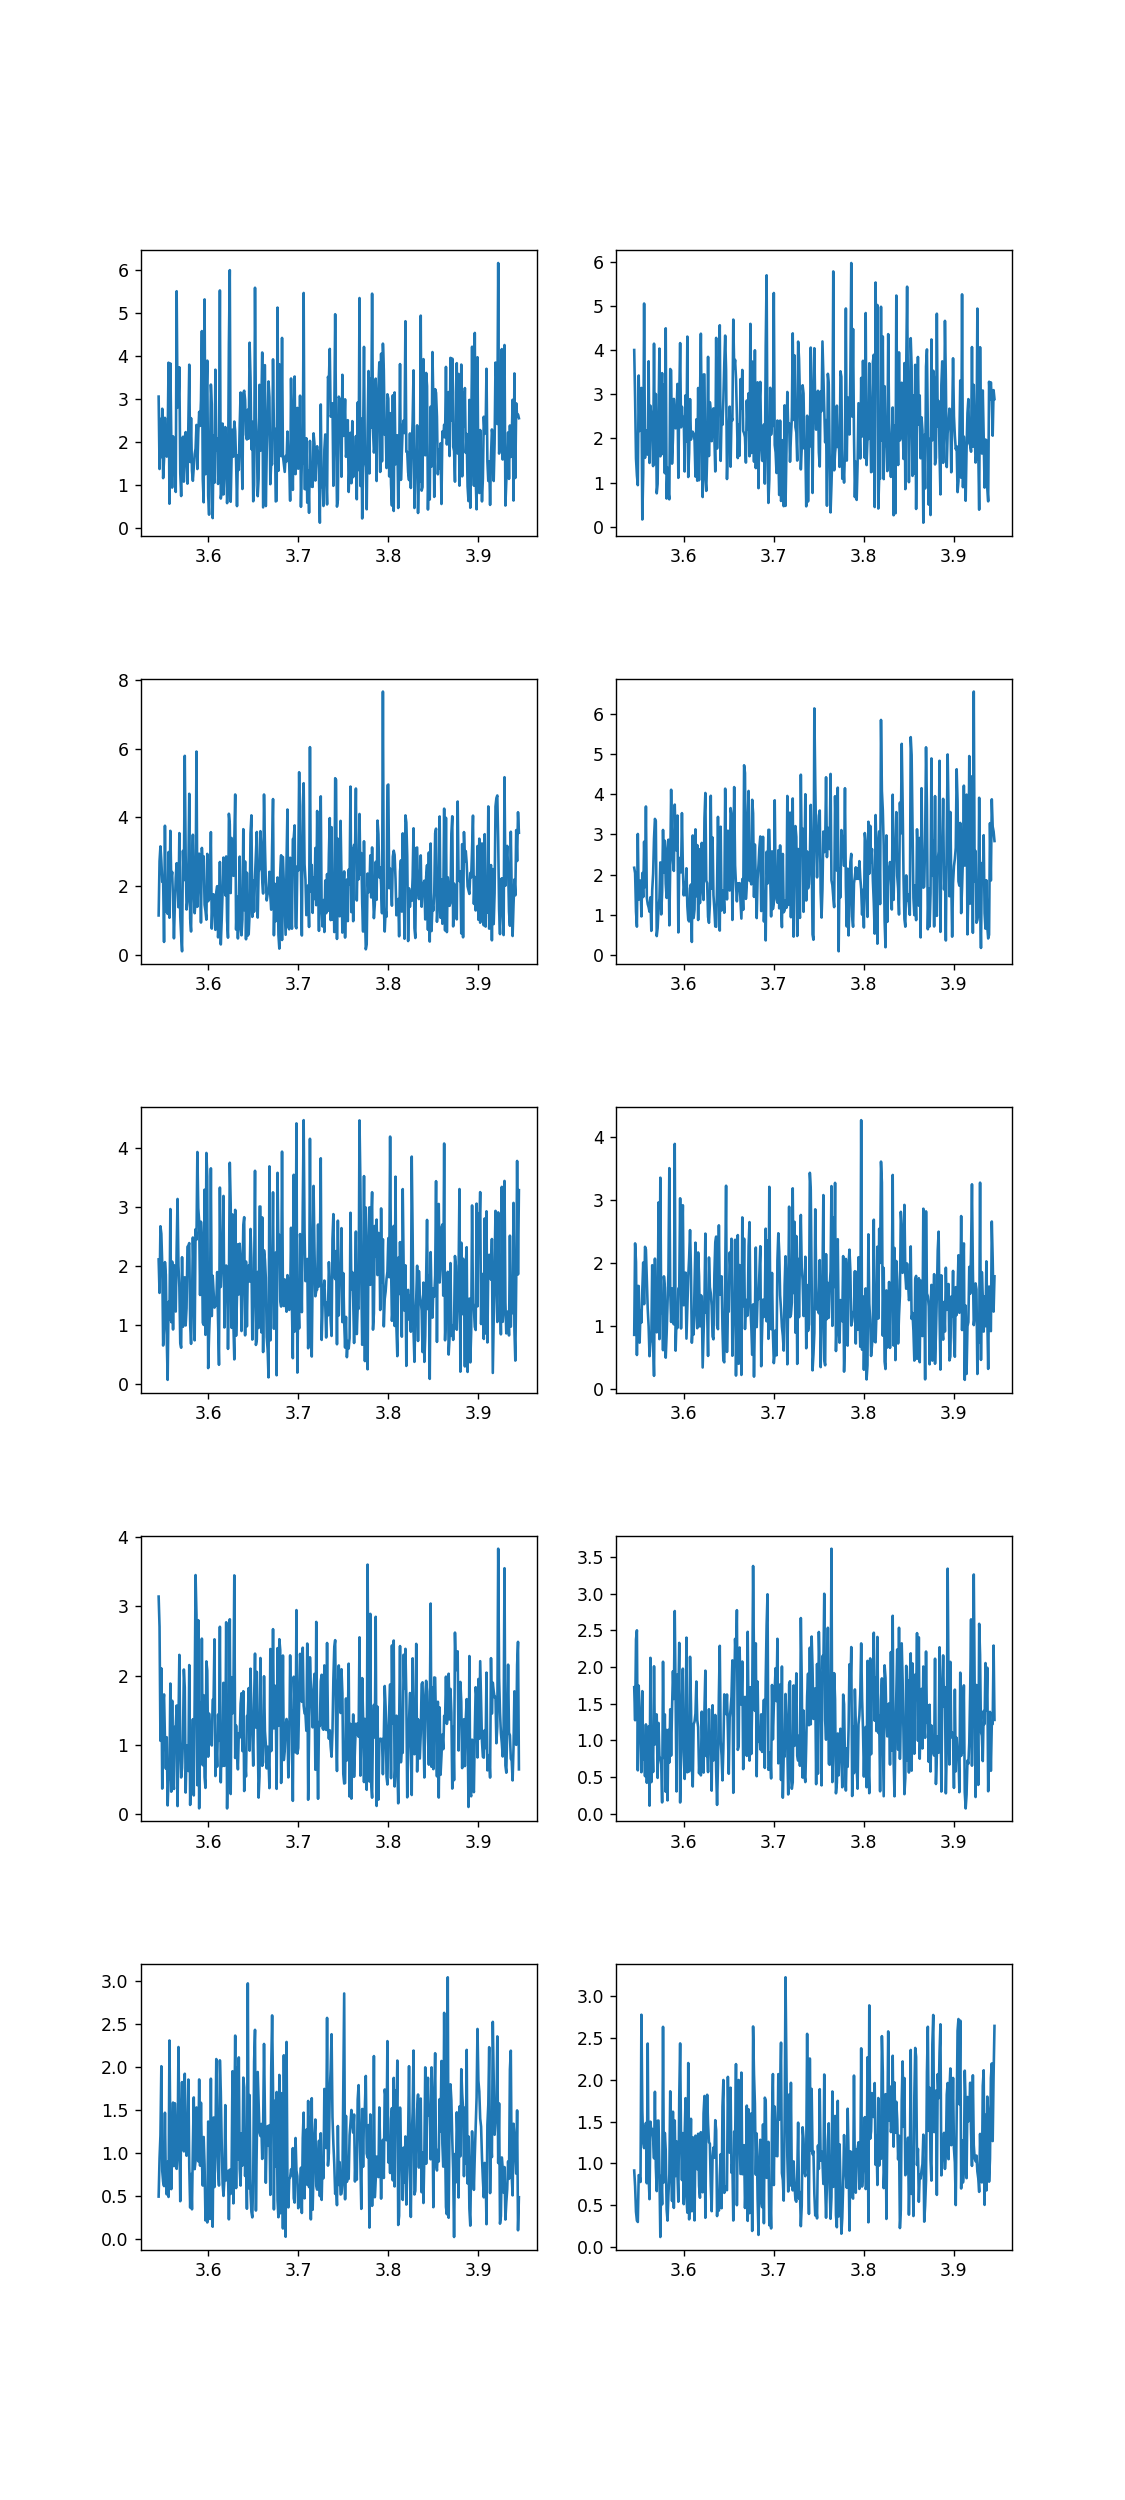

In [69]:
value,num,tags = write(height=4,which=0,peak=1120)

In [68]:
x, y, s = value[0][0],value[0][1], np.abs(value[0][2])
y = np.array([op.RowToRipe().firstMax(y,z,num=30,peakpercent=0.7) for z in s])
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].scatter(y[1:-1],x[1:-1],marker='.',c='',edgecolors='m')
ax[0].vlines(np.mean(y),np.max(x),np.min(x))
ax[0].set_title('pi/2=%.3f'%np.mean(y))
plt.show()

<IPython.core.display.Javascript object>


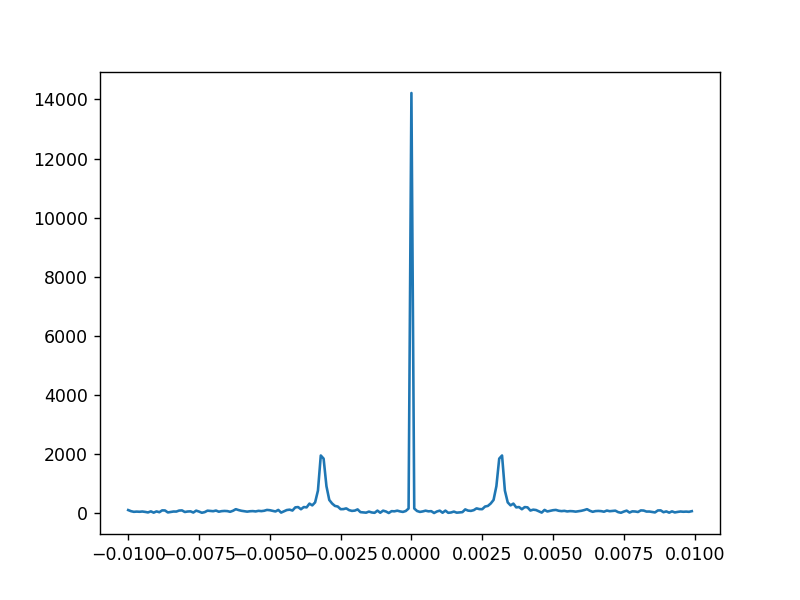

In [132]:
x, y = value[0][0],np.abs(value[0][1])
sample = (np.max(x) - np.min(x))/(len(x) - 1)
#         Ag, Cg= np.max(y)-np.min(y), np.mean(y) 
yt  = np.fft.fftshift(np.fft.fftfreq(len(y))) / sample
amp = np.fft.fftshift(np.fft.fft(y))
plt.figure()
plt.plot(yt,np.abs(amp))

# Crosstalk矩阵

In [138]:
z_crosstalk = np.ones((10,10))

<IPython.core.display.Javascript object>


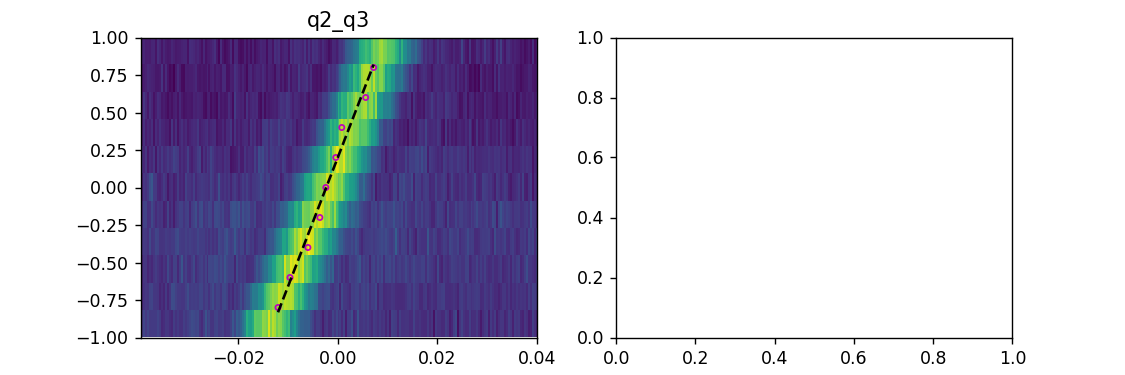

In [172]:
value,num,tags = write(height=3,title='crosstalkSpec',which=11,peak=1120)

In [ ]:
'q6-q3','q4_q7','q4-q6','q4-q5'

In [173]:
target = 1
v, f, s = value[target-1][0], value[target-1][1], value[target-1][2]
peak = (np.max(np.abs(s))+np.min(np.abs(s))) / 3
v, f, res = op.Crosstalk_Fit(peak=peak).fitCrosstalk(v,f,s,classify=False)
z = res[0]*f + res[1]
row, col = eval(tags[0][1])-1, eval(tags[0][-1])-1
z_crosstalk[row,col] = -1/res[0]
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[target-1].scatter(f[1:-1],v[1:-1],marker='.',c='',edgecolors='m')
ax[target-1].plot(f[1:-1],z[1:-1],'k--')
plt.show()

In [174]:
qname = ['q2','q3','q4','q5']
pd.DataFrame(z_crosstalk.T[1:5,1:5],columns=qname,index=qname)

,q2,q3,q4,q5
q2,1.000000,-0.011626,-0.003775,-0.007910
q3,0.019994,1.000000,-0.017023,-0.007725
q4,0.020027,0.021286,1.000000,-0.022010
q5,0.016164,0.014805,0.013947,1.000000


In [116]:
old = np.array([[ 1.        , -0.00614072,  0.00237171,  0.00339285,  0.01229189],
       [ 0.01965284,  1.        , -0.01015246, -0.00295805, -0.00609832],
       [ 0.01144612,  0.02177006,  1.        , -0.01671896, -0.00728347],
       [ 0.01140976,  0.02193547,  0.02581161,  1.        , -0.01872843],
       [ 0.00925843,  0.01711204,  0.01496927,  0.01558848,  1.        ]])

In [188]:
qname = ['q2','q3','q4','q5']
pd.DataFrame(old[1:5,1:5],columns=qname,index=qname)

,q2,q3,q4,q5
q2,1.000000,-0.010152,-0.002958,-0.006098
q3,0.021770,1.000000,-0.016719,-0.007283
q4,0.021935,0.025812,1.000000,-0.018728
q5,0.017112,0.014969,0.015588,1.000000


In [189]:
z = z_crosstalk.T[1:5,1:5] - old[1:5,1:5]
qname = ['q2','q3','q4','q5']
pd.DataFrame(z,columns=qname,index=qname)

,q2,q3,q4,q5
q2,0.000000,-0.001474,-0.000817,-0.001812
q3,-0.001776,0.000000,-0.000304,-0.000442
q4,-0.001909,-0.004526,0.000000,-0.003282
q5,-0.000948,-0.000164,-0.001641,0.000000


In [176]:
save('crosstalk_cali','xue_crosstalk_q2_5',mat=z_crosstalk.T)

WindowsPath('D:/QuLabData/2020/0401/crosstalk_cali/xue_crosstalk_q2_5_20200401211425.npz')

# 拟合二维谱

<IPython.core.display.Javascript object>


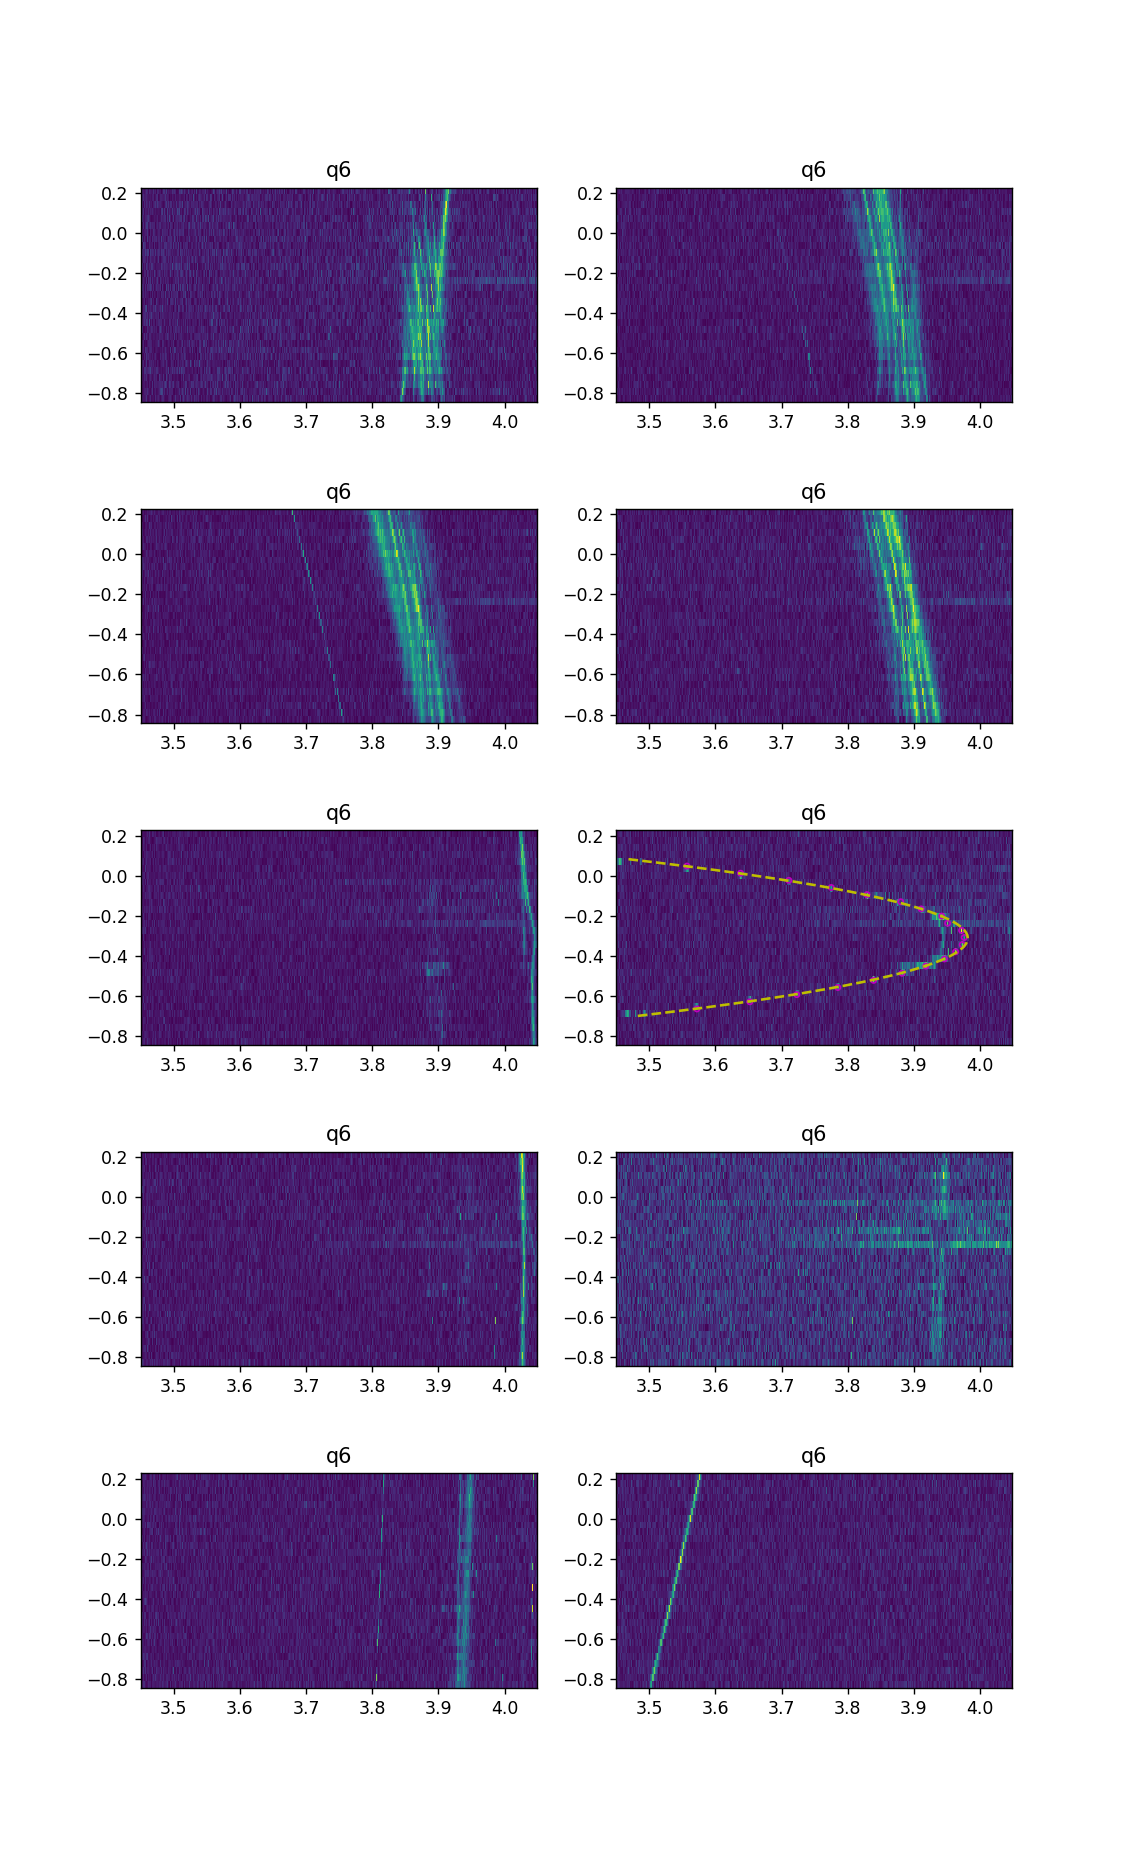

In [26]:
value,num,tags = write(height=3,title='spec2d',which=10,peak=1000)

In [27]:
target = 6
v, f, s = value[target-1][0], value[target-1][1], value[target-1][2]
peak = (np.max(np.abs(s))+np.min(np.abs(s))) / 2
f,v,A, C, W, phi = op.Spec2d_Fit(peak=peak).fitSpec2d(v,f,s,classify=False)
v1 = np.linspace(min(v),max(v),1001)
z = A*np.cos(2*np.pi*W*v1+phi)+C
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[target-1].scatter(f[1:-1],v[1:-1],marker='.',c='',edgecolors='m')
ax[target-1].plot(z[1:-1],v1[1:-1],'y--')
plt.show()

0.5209999999999426 3.796391304347788 1.2178784557301183 7.617088824073541


In [30]:
x = sy.Symbol('x',real=True)
y = A*sy.cos(2*sy.pi*W*x+phi)+C

In [34]:
q6 = q6._replace(specfunc=y)

In [36]:
q6.specfunc.evalf(subs={x:0.})

3.66251546755387

In [82]:
q4

qubit(q_name='q4', inst={'dc': 'dc11', 'z_awg': 'awg131', 'z_ch': 4, 'ex_awg': 'awg132', 'ex_ch': [7, 8], 'ex_lo': 'psg_ex2', 'com': 'com8'}, T_bias=[1.753, 0.176], specfunc=-199.359302124614*cos(0.0594068374593189*pi*x + 3.10601583645447) - 195.359697320355, bias=-0.2, zpulse=None, f_lo=array([6.54368e+09]), delta=array([50000000.]), f_ex=array([3.77395348e+09]), delta_ex=array([0]), power_ex=30, pi_len=19.0, T1=26511.572081147293)

# 拟合调制曲线找周期

In [8]:
n = 10
Tlist = {}
matrix_cross = np.zeros((n,n)) #收集crosstalk矩阵元
matrix_phi = np.zeros((n,n))

<IPython.core.display.Javascript object>


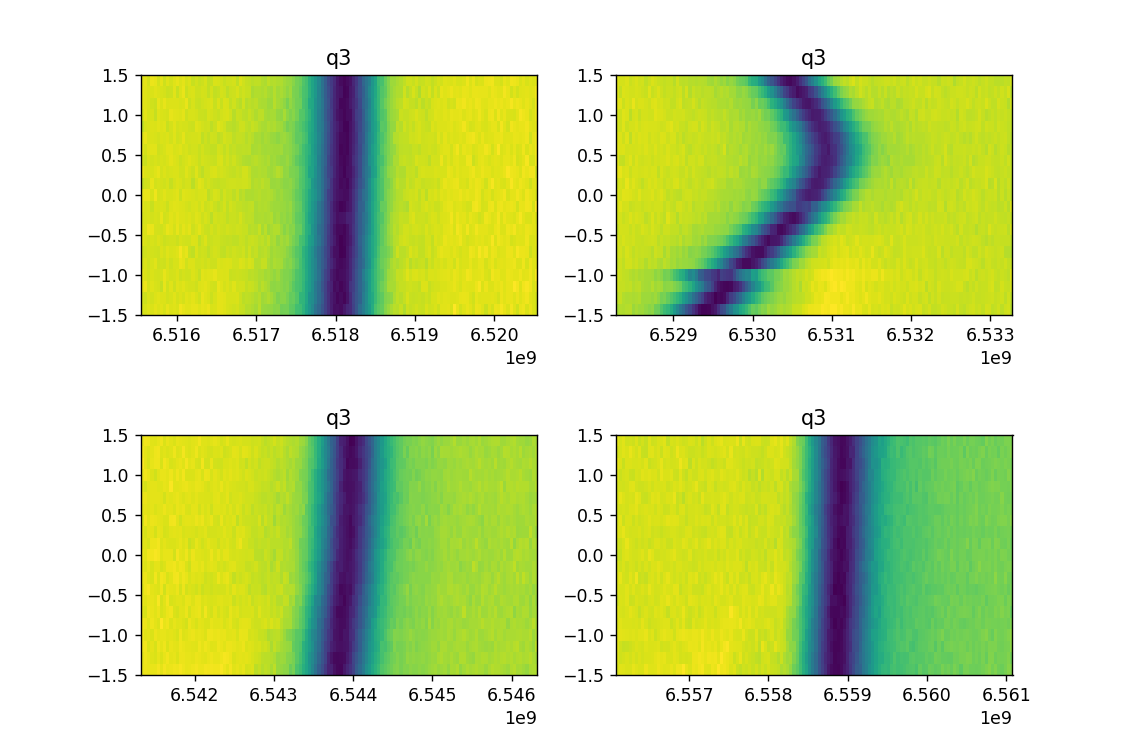

['q3']

In [178]:
value,num,tags = write(height=3,title='S21vsFlux_awgoffset',which=0,peak=1000) #S21vsFlux_awgoffset
tags

<IPython.core.display.Javascript object>


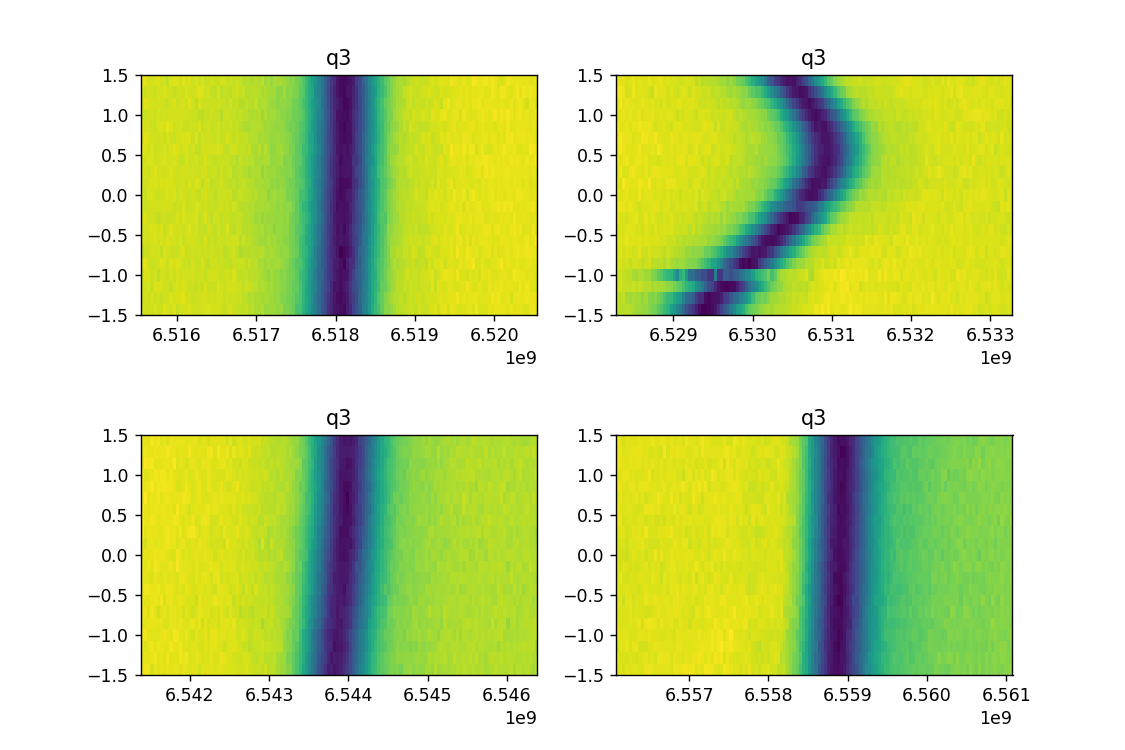

In [135]:
value,num,tags = write(height=3,title='S21vsFlux_awgoffset',which=0,peak=1000) #S21vsFlux_awgoffset

In [160]:
q10

qubit(q_name='q10', inst={'dc': 'dc10', 'z_awg': 'awg131', 'z_ch': 8, 'ex_awg': 'awg132', 'ex_ch': [5, 6], 'ex_lo': 'psg_ex2', 'com': 'com6'}, T_bias=[2.032, 0.368], specfunc=-93.2181910291993*cos(0.0733463105673384*pi*x + 3.124208850395) - 89.3095042728714, bias=-0.298, zpulse=None, f_lo=[6629000000.0], delta=array([50000000.]), f_ex=array([3.684e+09]), delta_ex=array([0]), power_ex=50, pi_len=None, T1=None)

In [30]:
n_target = 1
mat = fit_cos(tag='q_%d'%n_target)
matrix_cross[:,n_target-1] = np.array(mat)[:,0]
matrix_phi[:,n_target-1] = np.array(mat)[:,1]
Tlist

0.0015599999999995617 6.50441619047619 0.47619047619047616 2.0406939339584707
0.00039999999999995595 6.518013333333333 0.23809523809523808 2.6095230475281785
0.000600000000000378 6.530670476190476 0.23809523809523808 2.5908671471132276
0.0005999999999994898 6.543894285714285 0.23809523809523808 2.6786355511772317
0.000280000000000058 6.558882857142857 0.23809523809523808 2.7586064901673106
0.0007599999999996498 6.572989523809525 0.23809523809523808 2.616054749597904
0.00016000000000016001 6.586873333333334 0.23809523809523808 2.6698133884013626
0.00048000000000048004 6.599467619047617 0.7142857142857142 2.586984801483541
0.00032000000000032003 6.604528571428572 0.23809523809523808 1.6237494682460536
0.000280000000000058 6.629115238095238 0.23809523809523808 2.5510566640225343


{'q10': [2.032, 0.368],
 'q9': [1.723, 0.036],
 'q8': [1.665, 0.2],
 'q7': [1.801, 0.028],
 'q6': [1.785, -0.308],
 'q5': [1.803, 0.068],
 'q4': [1.753, 0.176],
 'q3': [1.759, 0.224],
 'q2': [1.896, 0.22],
 'q1': [2.038, 0.104]}

In [11]:
def fit_cos(tag):
    mat = []
    At = 0
    for i in range(len(value)):
        volt, freq, s = value[i]
        #volt, s = volt[3:-3], s[3:-3,:]
        x, y = op.RowToRipe().manipulation(volt,freq,s)
        A, C, W, phi = op.Cos_Fit().fitCos(x,y)
        T = 1 / W
        fig = plt.gcf() 
        axes = plt.getp(fig,'axes')
        axes[i].plot(y,x,'ro')
        x1 = np.linspace(min(volt),max(volt),1001)
        y1 = A*np.cos(2*np.pi/T*x1+phi)
        axes[i].plot(y1+C,x1,'b-')
        #if i != int(tag[2:]) - 1:
        t = symbols("t")
        z = A*sy.cos(2*np.pi/T*t+phi)+C
        z_diff = diff(z,t)
        if z_diff.evalf(subs = {t:0}) < 0:
            T *= -1
            if phi<0:
                phi *= -1
        phi = phi % (2*np.pi)
        mat.append((1/T,phi))
        if i == int(tag[2:]) - 1:
            bias0 = op.RowToRipe().firstMax(x1,y1,num=0)
            Tlist[tags[0]] = [round(np.abs(T),3),bias0]
        axes[i].set_title(r'$ q%d,T = %g,phi=%g $' %(i+1,T,phi))
    return mat
        

In [32]:
bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
for i, j in enumerate(bit):
    globals()['q%d'%(i+1)] = j._replace(T_bias=Tlist['q%d'%(i+1)])

# 拟合T1

<IPython.core.display.Javascript object>


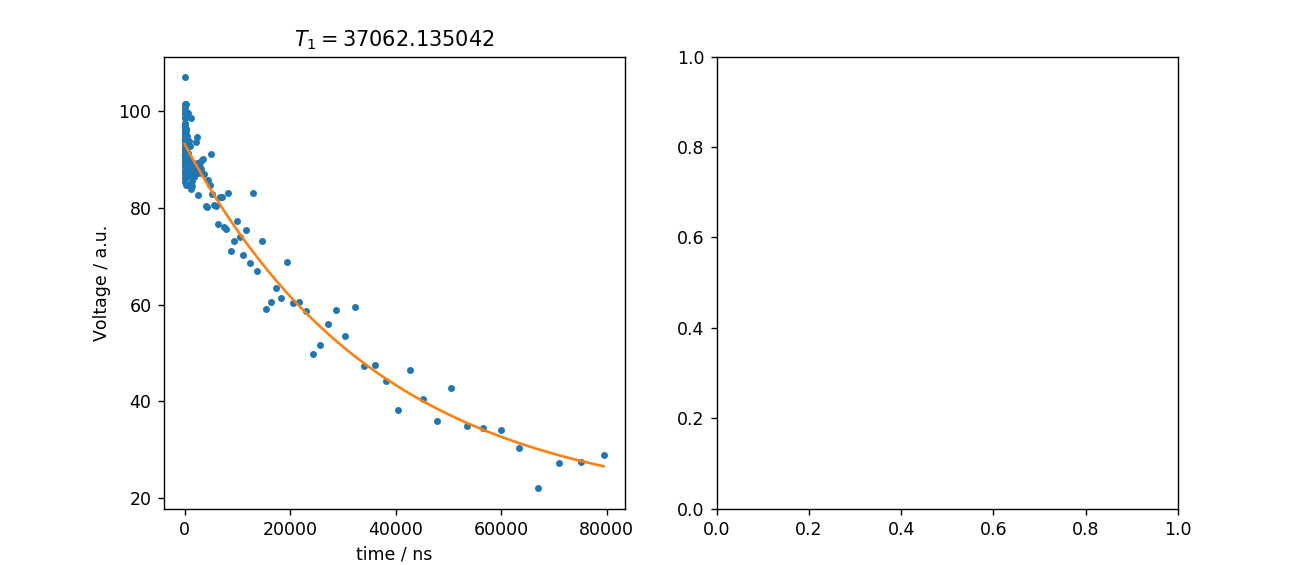

In [87]:
value,num,tags = write(height=4,title='T1',which=0)

In [88]:
x, y = value[0][0], value[0][1]
A, B, T1 = op.Exp_Fit().fitExp(x,np.abs(y))
z = A * np.exp(-x/T1) + B
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(x,z)
ax[0].set_title('$T_{1}=%f$'%T1)
ax[i].set_xlabel('time / ns')
ax[i].set_ylabel('Voltage / a.u.')
plt.show()

# 拟合Rabi

<IPython.core.display.Javascript object>


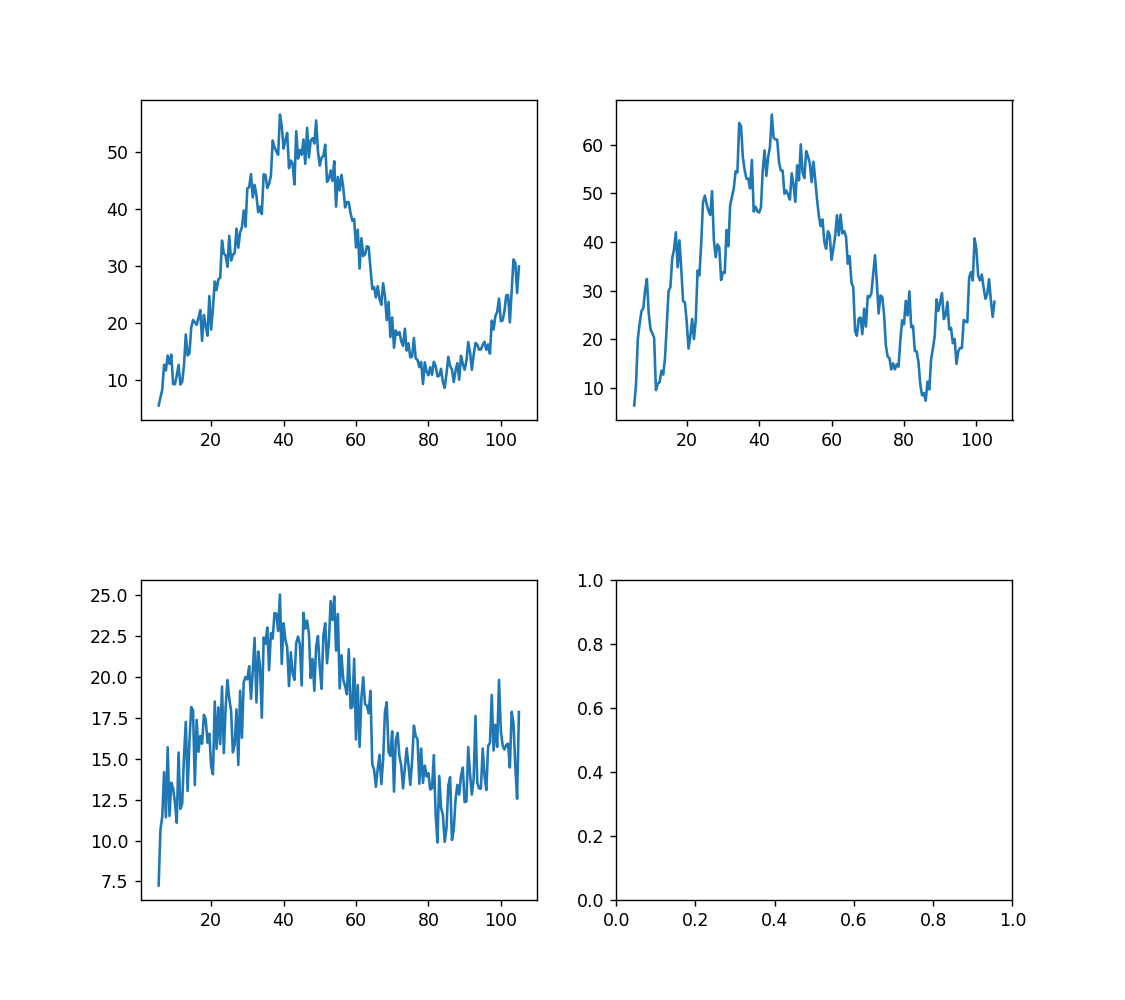

In [5]:
value,num,tags = write(height=4,title='rabi',which=0)

In [77]:
op.RowToRipe().firstMax(value[0][0],np.abs(value[0][1]),num=270)

88.0

In [10]:
help(np.diff)

Help on function diff in module numpy:

diff(a, n=1, axis=-1, prepend=<no value>, append=<no value>)
    Calculate the n-th discrete difference along the given axis.
    
    The first difference is given by ``out[i] = a[i+1] - a[i]`` along
    the given axis, higher differences are calculated by using `diff`
    recursively.
    
    Parameters
    ----------
    a : array_like
        Input array
    n : int, optional
        The number of times values are differenced. If zero, the input
        is returned as-is.
    axis : int, optional
        The axis along which the difference is taken, default is the
        last axis.
    prepend, append : array_like, optional
        Values to prepend or append to "a" along axis prior to
        performing the difference.  Scalar values are expanded to
        arrays with length 1 in the direction of axis and the shape
        of the input array in along all other axes.  Otherwise the
        dimension and shape must match "a" except along ax

In [78]:
fig = plt.gcf()
ax = plt.getp(fig,'axes')
for i in range(num):
    x, y  = value[i][0], value[i][1]
    A,B,T1,w,phi = op.Rabi_Fit(envelopemethod='hilbert').fitRabi(np.abs(x),np.abs(y))
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
    ax[i].plot(x,z)
    ax[i].set_title('$T_{1}=%f,period=%f$'%(T1,1/w/2))
    ax[i].set_xlabel('time / ns')
    ax[i].set_ylabel('Voltage / a.u.')
plt.show()

(73.41623453748893, 125.69010730941586, 20000, 0.04, 1.5707963267948966)


In [12]:
np.shape(x)

(500,)

# 拟合Ramsey及SpinEcho

<IPython.core.display.Javascript object>


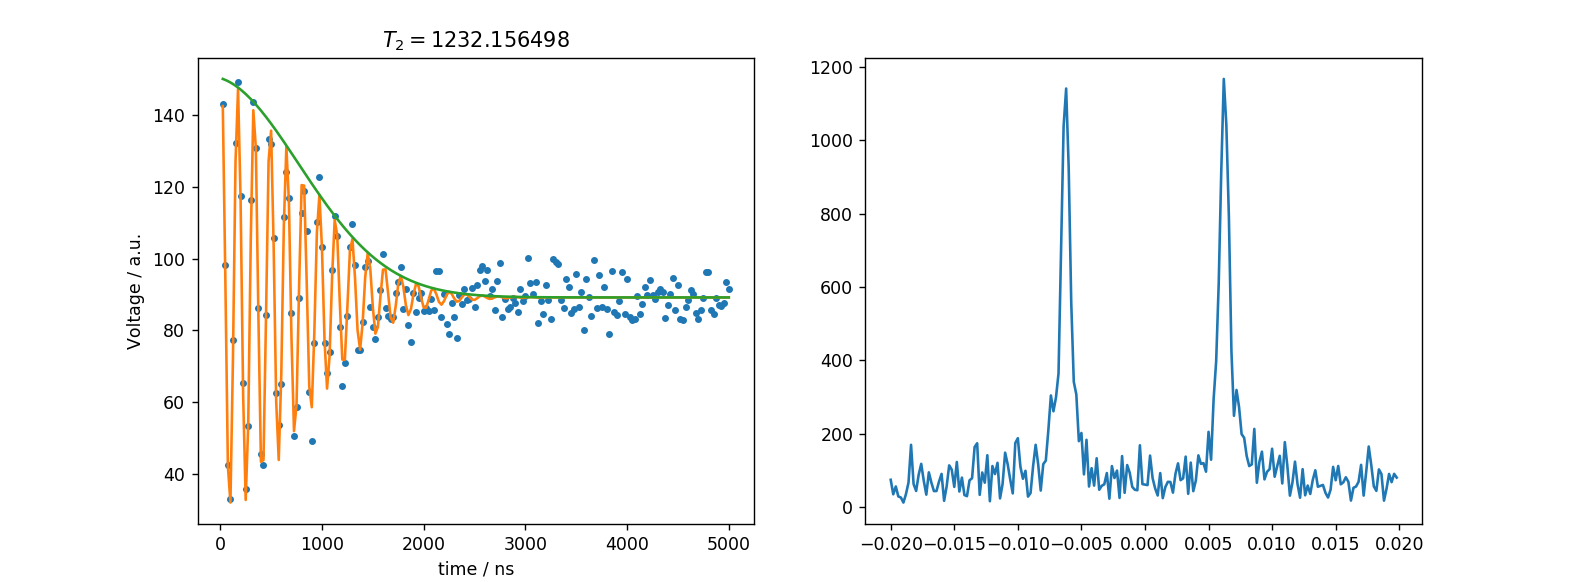

In [94]:
value,num,tags = write(height=4,title='Ramsey',which=0)

<IPython.core.display.Javascript object>


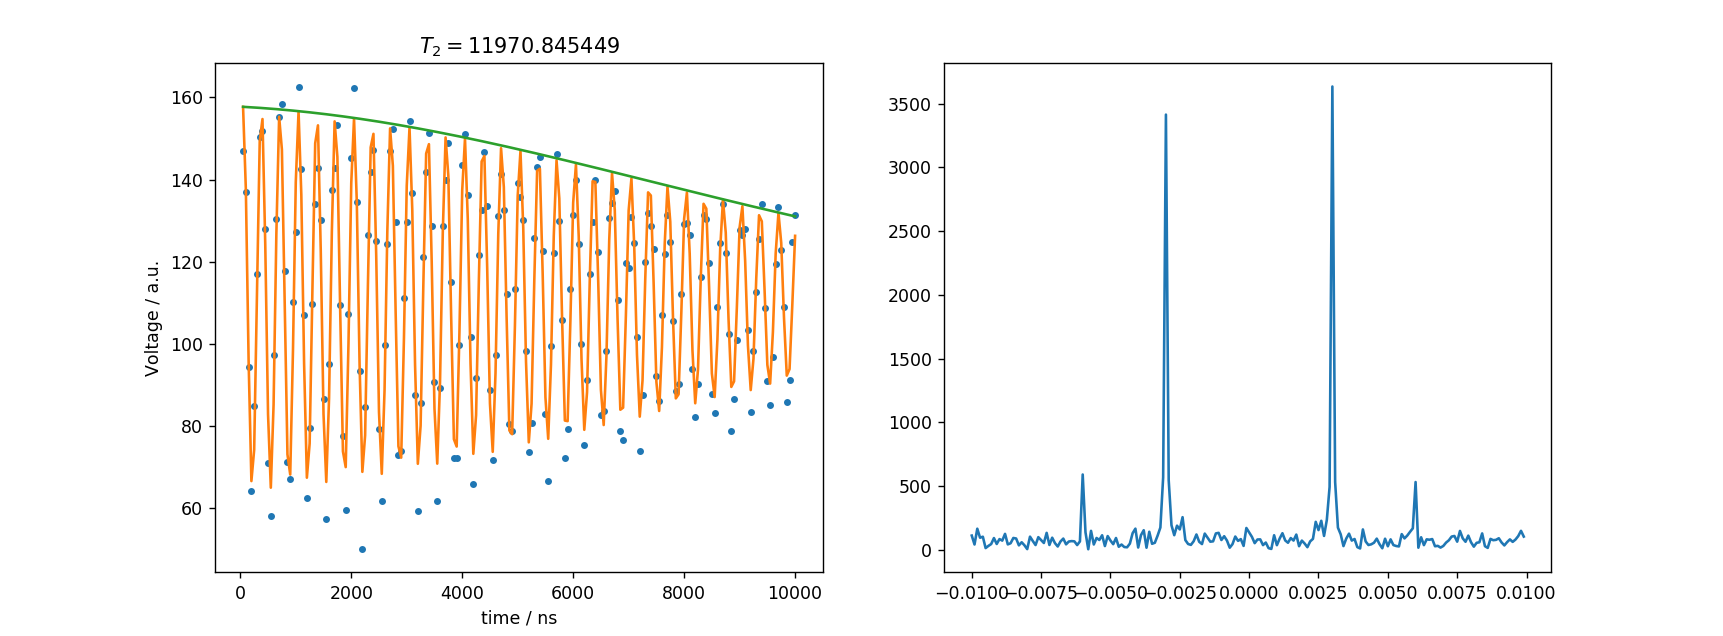

In [96]:
value,num,tags = write(height=4,title='SpinEcho',which=0)

In [97]:
fig = plt.gcf()
ax = plt.getp(fig,'axes')
for i in range(num):
    x, y  = value[i][0], value[i][1]
    sample = (np.max(x) - np.min(x))/(len(x) - 1)
    yt  = np.fft.fftshift(np.fft.fftfreq(len(y))) / sample
    amp = np.fft.fftshift(np.fft.fft(y))
    A,B,T1,T2,w,phi = op.T2_Fit(funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
    z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
    z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
    ax[i].plot(x,z)
    ax[i].plot(x,z_env)
    #ax[i].set_title('$T_{1}=%f,T_{2}=%f,w=%f$'%(T1,T2,w*1e3))
    ax[i].set_title('$T_{2}=%f$'%T2)
    ax[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
    ax[i].set_xlabel('time / ns')
    ax[i].set_ylabel('Voltage / a.u.')
plt.show()

(56.315344536018, 129.14460178348463, 35000, 7098.677660613497, 0.003, 0)


<IPython.core.display.Javascript object>


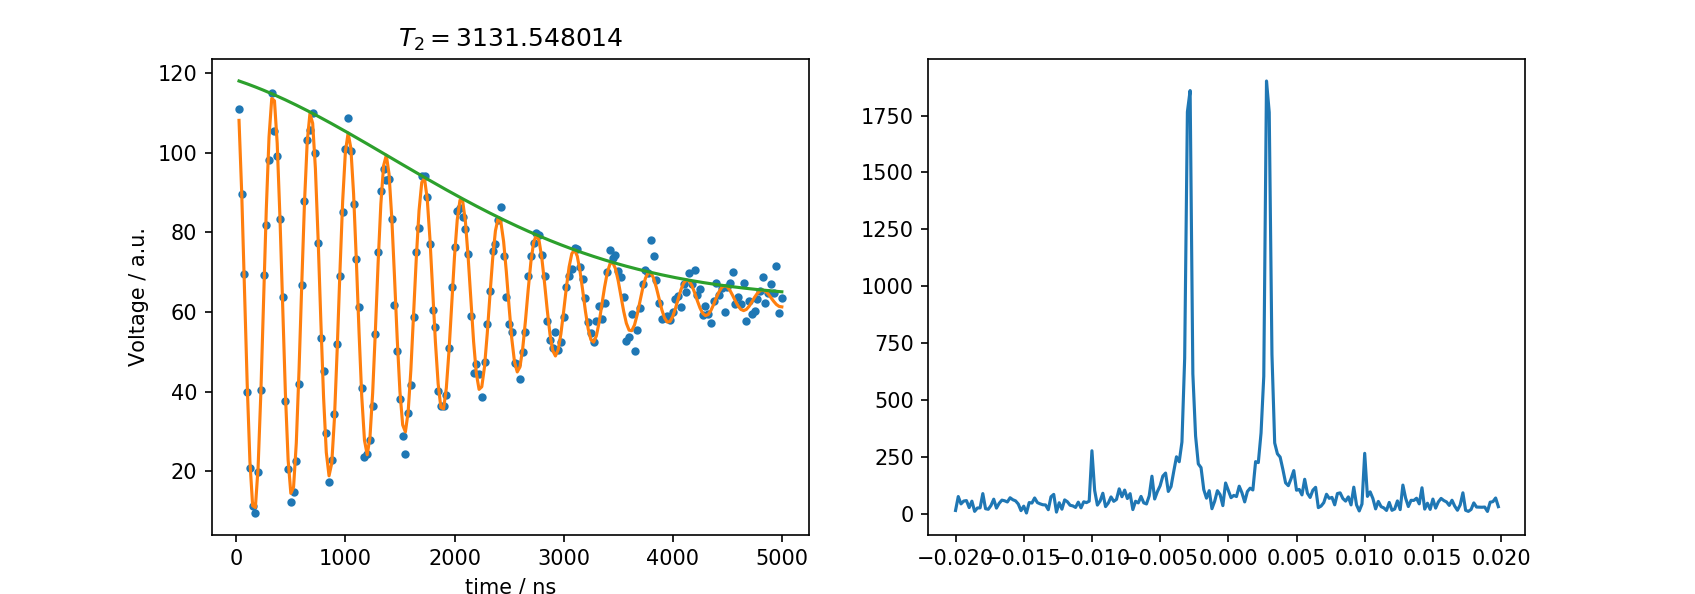

In [327]:
value,num,tags = write(height=4,title='Ramsey',which=6)

<IPython.core.display.Javascript object>


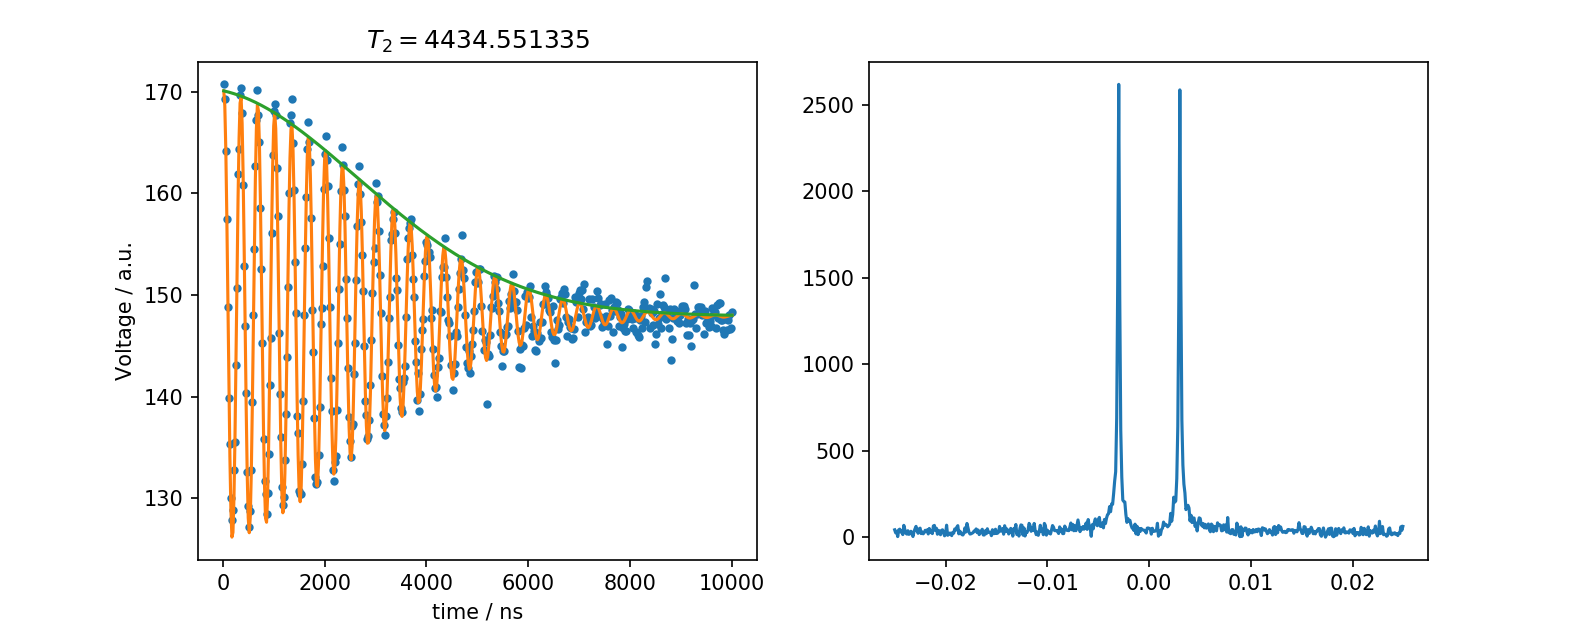

In [329]:
value,num,tags = write(height=4,title='SpinEcho',which=6)

In [230]:
np.savez(r'C:\Users\23967\Desktop\spec\singlespec.npz',x=value[0][0],y=value[0][1])

<IPython.core.display.Javascript object>


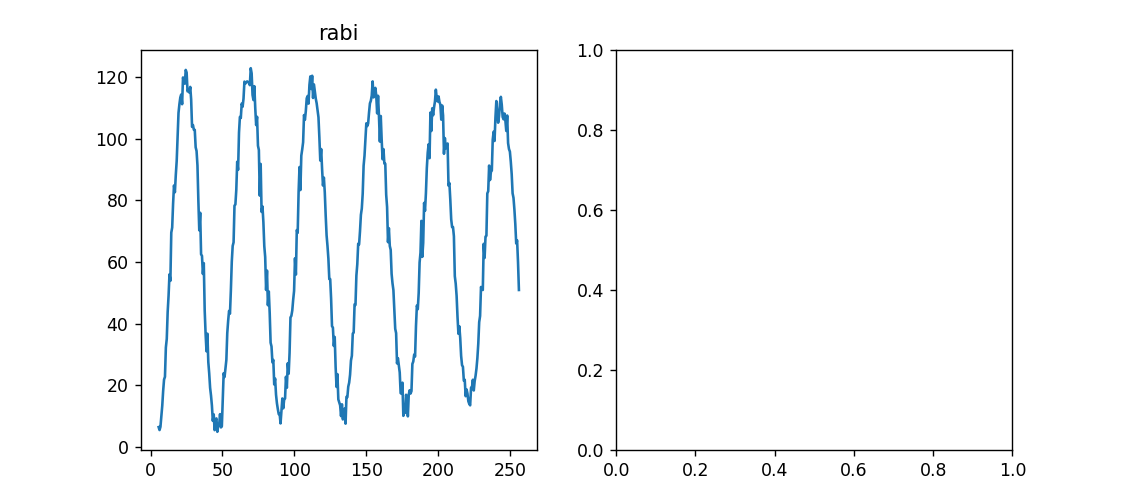

In [239]:
value,num,tags = write(height=4,title='rabi',which=8)
np.savez(r'C:\Users\23967\Desktop\spec\rabi.npz',x=value[0][0],y=value[0][1])

In [89]:
np.savez(r'C:\Users\23967\Desktop\spec\T1.npz',x=value[0][0],y=value[0][1])

In [22]:
list(np.array([0,1,2,3,4,5]) > 2).count(True)

3